## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [245]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [246]:
print(X.info()) # пропущенные значения отсутствуют, категориальных переменных нет (Dtype у всех переменных равен float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [250]:
normalizer = StandardScaler()
normalizer.fit(X_train[['alcohol', 'magnesium']])
X_train_transformed = normalizer.transform(X_train[['alcohol', 'magnesium']])
X_test_transformed = normalizer.transform(X_test[['alcohol', 'magnesium']])

In [251]:
import joblib

In [252]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = KNeighborsClassifier(n_neighbors=10)
clf5 = KNeighborsClassifier(n_neighbors=15)
clf6 = KNeighborsClassifier(n_neighbors=25)

In [253]:
lab = ['model1.pkl', 'model2.pkl', 'model3.pkl', 'model4.pkl', 'model5.pkl', 'model6.pkl']
clf = [clf1, clf2, clf3, clf4, clf5, clf6]
for clf, lab in zip(clf, lab):
    clf.fit(X_train_transformed, y_train)
    joblib.dump(clf, lab)

In [254]:
models = []
names = ['model1.pkl', 'model2.pkl', 'model3.pkl', 'model4.pkl', 'model5.pkl', 'model6.pkl']
for name in names:
    models.append(joblib.load(name))

In [255]:
models

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=15),
 KNeighborsClassifier(n_neighbors=25)]

In [256]:
for clf in models:
    
    y_predicted = clf.predict(X_test_transformed)
    y_predicted_train = clf.predict(X_train_transformed)
    print(clf, "\nAccuracy on train is: ", np.mean(y_train == y_predicted_train))
    print("Accuracy on test is: ", np.mean(y_test == y_predicted), "\n")

KNeighborsClassifier(n_neighbors=1) 
Accuracy on train is:  1.0
Accuracy on test is:  0.6666666666666666 

KNeighborsClassifier(n_neighbors=3) 
Accuracy on train is:  0.8064516129032258
Accuracy on test is:  0.7777777777777778 

KNeighborsClassifier() 
Accuracy on train is:  0.75
Accuracy on test is:  0.7222222222222222 

KNeighborsClassifier(n_neighbors=10) 
Accuracy on train is:  0.7338709677419355
Accuracy on test is:  0.7777777777777778 

KNeighborsClassifier(n_neighbors=15) 
Accuracy on train is:  0.7338709677419355
Accuracy on test is:  0.7962962962962963 

KNeighborsClassifier(n_neighbors=25) 
Accuracy on train is:  0.6693548387096774
Accuracy on test is:  0.7962962962962963 



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [257]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [259]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

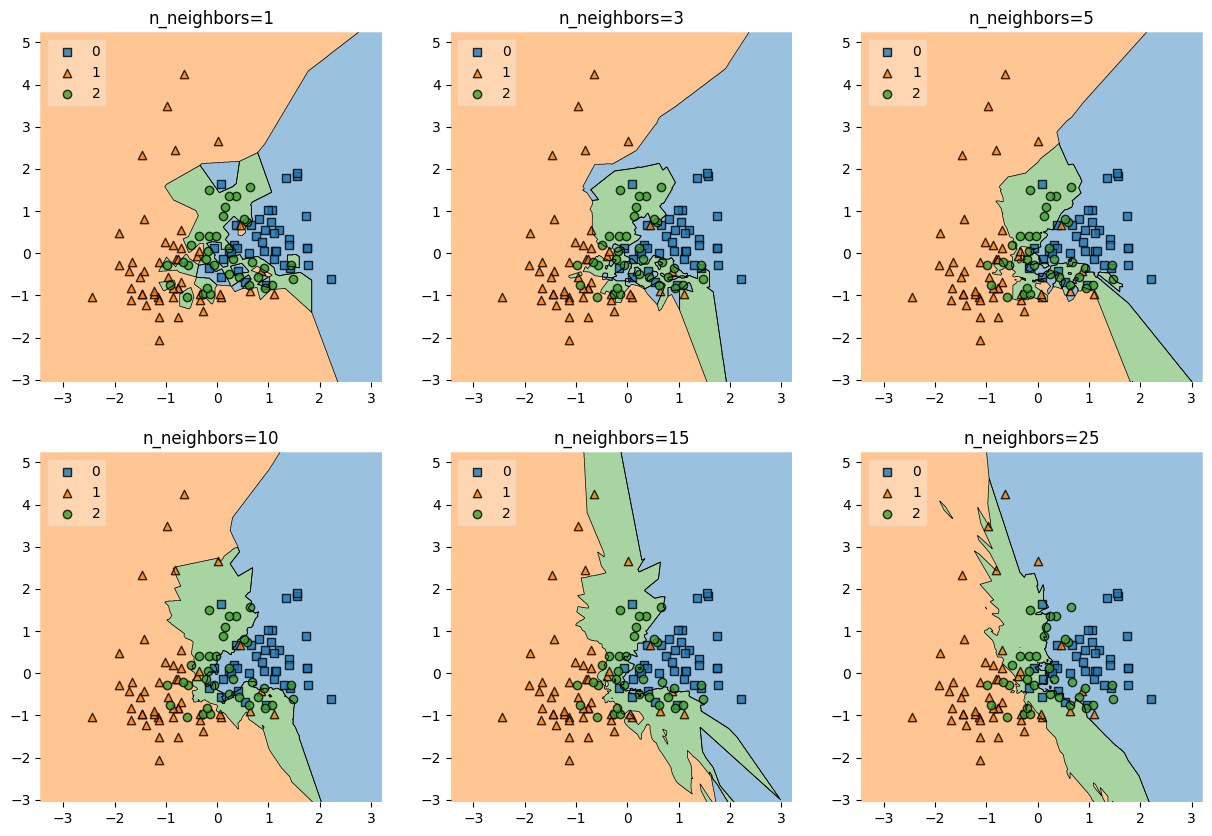

In [260]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 10))

labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']

for clf, lab, grd in zip(models, labels, itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Оптимальное число соседей равно 10, 15 или 25, так как на предыдущих моделях явно видно переобучение, модель слишком подстраивается под отдельные точки. Если смотреть на задание 1.3, то на тесте лучше всего показывает себя число соседей равное 15.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

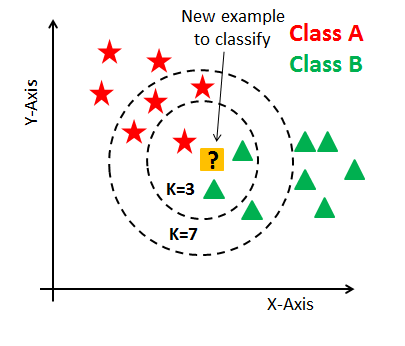

In [19]:
import numpy as np
from collections import Counter 
import math

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distance = np.sqrt(np.sum((self.X - X[i])**2, axis=1)) # евклидово расстояние
            distance = sorted(list(zip(distance, self.y)), key=lambda x: x)[:self.k]
            labels = [i[1] for i in distance]
            c = Counter(labels)
            common = list(c.most_common(1)[0])
            y_pred.append(common[0])
        return y_pred

In [20]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [21]:
knn = KNN(k=3)
X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
X_test = np.array([[5, 5], [2, 2]])
knn.fit(X_train, y_train)
knn.predict(X_test)

[1, 0]

In [22]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN) # какая-то проблема с последним тестом, хотя результат правильный

TypeError: 'bool' object is not iterable

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [5]:
data = pd.read_csv("C:/Users/Ольга/Desktop/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [6]:
data.info() #  # пропущенные значения отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [7]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [8]:
correl = data.corr(numeric_only=True)
pd.DataFrame(correl['price'])

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


Больше всего с целовой пересенной коррелируют x, y и z, то есть размеры бриллианта.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [9]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [25]:
X = data.drop('price', axis=1) 
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.52,60.7,59.0,5.18,5.14,3.13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52416,0.70,63.6,60.0,5.59,5.51,3.51,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42613,0.32,61.3,58.0,4.35,4.39,2.68,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43567,0.41,61.0,57.0,4.81,4.79,2.93,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [27]:
normalizer = StandardScaler()
normalizer.fit(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_train_transformed = normalizer.transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test_transformed = normalizer.transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [28]:
X_train[['carat', 'depth', 'table', 'x', 'y', 'z']] = X_train_transformed
X_test[['carat', 'depth', 'table', 'x', 'y', 'z']] = X_test_transformed
X_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10176,0.635415,0.170523,-1.097543,0.781869,0.791735,0.802328,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16083,1.035685,0.588814,-0.649638,1.093490,1.034149,1.139814,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
13420,0.846083,-0.456913,0.246171,1.022262,0.921600,0.900762,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
20407,1.478088,-0.596343,-0.649638,1.511952,1.406428,1.350743,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8909,0.214078,-0.038622,-0.201734,0.390117,0.410799,0.394533,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [30]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_train_predicted = reg.predict(X_train)
y_test_predicted = reg.predict(X_test)

In [31]:
print('Train:', mean_squared_error(y_train, y_train_predicted))
print('Test:', mean_squared_error(y_test, y_test_predicted))

Train: 1284661.8621191257
Test: 1259159.1137946625


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [32]:
sorted(list(zip(data.columns, reg.coef_)), key=lambda x: abs(x[1]))

[('x', -2.647379706640835),
 ('y', -40.56862298889787),
 ('table', -65.61837226838202),
 ('depth', -94.26693610935115),
 ('cut_Very Good', -180.61797246399868),
 ('color_E', -236.92469425225576),
 ('color_F', -450.5585333426724),
 ('z', 541.6398685229361),
 ('cut_Premium', 698.4331729582075),
 ('cut_Ideal', 721.7975349311339),
 ('cut_Good', 795.7868168651914),
 ('color_G', -943.6180436874429),
 ('price', -1050.0247597557116),
 ('color_H', -1428.8083325411665),
 ('color_I', -2343.375150589746),
 ('clarity_SI1', 2701.8680983934214),
 ('clarity_IF', 3670.3780923336894),
 ('clarity_VS1', 4272.557380908746),
 ('clarity_SI2', 4592.448266754504),
 ('clarity_VVS1', 4954.598502437001),
 ('clarity_VS2', 5021.558582804114),
 ('carat', 5278.119983939033),
 ('color_J', 5333.555068877383)]

Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных: carat, color_J

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [33]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10)
clf.fit(X_train, y_train)
coef = [abs(x) for x in clf.coef_]
coef

[4717.430499070526,
 153.89762985715788,
 114.35949776937956,
 634.6659612460708,
 0.0,
 23.863759406197335,
 0.0,
 157.77331087712668,
 64.96421212358892,
 82.91236049399059,
 2.8924510873096567,
 0.0,
 111.41756574016668,
 594.7973731877526,
 989.2379477534535,
 1785.7909553995376,
 1366.3473743176146,
 70.86192178083752,
 735.0849337241613,
 909.4138242825011,
 655.593918913367,
 1242.9912393298814,
 1240.7102935696953]

In [34]:
from sklearn.linear_model import Ridge
clf1 = Ridge(alpha=10)
clf1.fit(X_train, y_train)
coef1 = [abs(x) for x in clf1.coef_]
coef1

[5228.441289519717,
 97.2441605530603,
 68.54792964093464,
 1012.7671324538111,
 1.7180061054983489,
 41.6912899313855,
 564.9722499905611,
 823.308088912565,
 746.1471540692394,
 727.722546124511,
 168.55782761244106,
 223.70262110463992,
 433.1824403132912,
 926.8781788918807,
 1404.3491505302588,
 2308.4349444766094,
 4760.4721965346125,
 3142.7904217888886,
 2182.154616797408,
 4055.762261814706,
 3741.392262596915,
 4470.745335828288,
 4411.391730137036]

Веса уменьшились достаточно сильно в Lasso, а в Ridge не особо сильно. Мультиколлинеарности проявлялась в изначальной регрессии достаточно сильно, так как несколько признаков занулились.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [35]:
from numpy import linalg as LA

In [36]:
lasso1 = linear_model.Lasso(alpha=0.1)
lasso2 = linear_model.Lasso(alpha=1)
lasso3 = linear_model.Lasso(alpha=10)
lasso4 = linear_model.Lasso(alpha=100)
lasso5 = linear_model.Lasso(alpha=200)

coefs_lasso = []

for lasso in [lasso1, lasso2, lasso3, lasso4, lasso5]:
    lasso.fit(X_train, y_train)
    coefs_lasso.append(LA.norm(lasso.coef_))

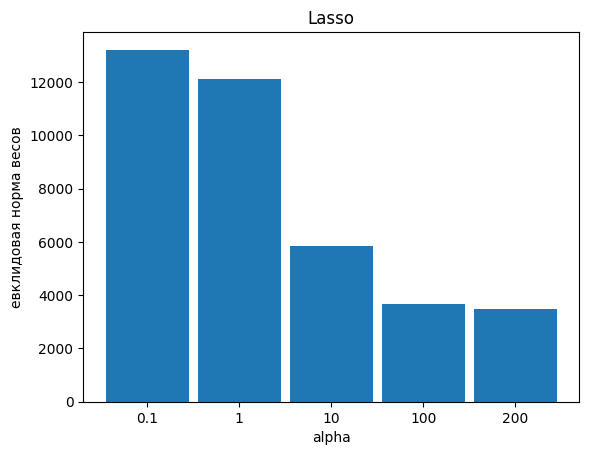

In [37]:
names = ['0.1', '1', '10', '100', '200']
plt.bar(names, coefs_lasso, width = 0.9)
plt.xlabel("alpha")
plt.ylabel("евклидовая норма весов")
plt.title("Lasso")
plt.show()

In [38]:
Ridge1 = linear_model.Ridge(alpha=0.1)
Ridge2 = linear_model.Ridge(alpha=1)
Ridge3 = linear_model.Ridge(alpha=10)
Ridge4 = linear_model.Ridge(alpha=100)
Ridge5 = linear_model.Ridge(alpha=200)

coefs_Ridge = []

for Ridge in [Ridge1, Ridge2, Ridge3, Ridge4, Ridge5]:
    Ridge.fit(X_train, y_train)
    coefs_Ridge.append(LA.norm(Ridge.coef_))

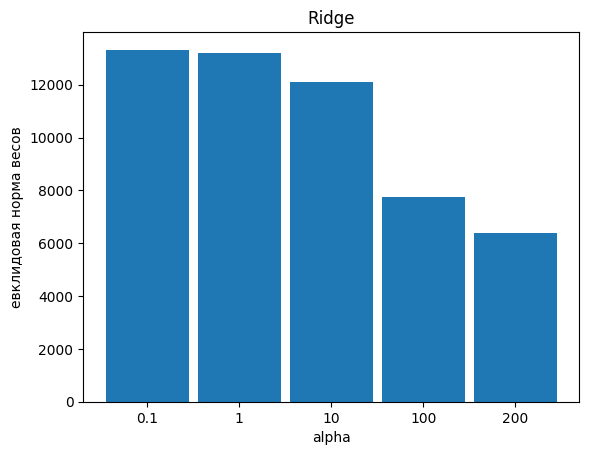

In [39]:
names = ['0.1', '1', '10', '100', '200']
plt.bar(names, coefs_Ridge, width = 0.9)
plt.xlabel("alpha")
plt.ylabel("евклидовая норма весов")
plt.title("Ridge")
plt.show()

Lasso агрессивнее уменьшает веса. Для переменных, которые дают наименьший вклад в предсказание цены, 
коэффициенты станут нулевыми. Тем самым lasso полностью обнуляет незначимые коэффициенты, что дает нам понимание, какие признаки действительно важны. Ridge уменьшает веса не так резко, поэтому Lasso регрессия более репрезантивна для отбора признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [40]:
from sklearn.linear_model import LassoCV

In [41]:
reg_l = LassoCV(cv=5, alphas=[0.1, 1, 10, 100, 200], random_state=42).fit(X_train, y_train)

C:\Users\Ольга\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177271856.3713303, tolerance: 48309472.87280813
  model = cd_fast.enet_coordinate_descent_gram(


In [42]:
df = pd.DataFrame(data=reg_l.alphas_)
mse = reg_l.mse_path_
df['mse'] = np.mean(mse, axis=1)
df

,0,mse
0,200.0,2.449044e+06
1,100.0,2.240369e+06
2,10.0,1.517680e+06
3,1.0,1.292173e+06
4,0.1,1.293501e+06


In [43]:
np.mean(mse, axis=1)

array([2449043.71149809, 2240369.32710809, 1517680.18156032,
       1292173.07832109, 1293501.15219298])

Наименьшая ошибка при альфа = 1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [44]:
lasso2 = linear_model.Lasso(alpha=1.0)
lasso2.fit(X_train, y_train)
sorted(list(zip(data.columns, lasso2.coef_)), key=lambda x: abs(x[1]))

[('x', -0.0),
 ('y', -38.513158934273655),
 ('table', -72.11474229522291),
 ('depth', -103.13762135298842),
 ('cut_Very Good', -127.15409692123475),
 ('color_E', -183.44785076828842),
 ('color_F', -392.8279934931738),
 ('z', 437.820509352373),
 ('cut_Premium', 601.6004718446186),
 ('cut_Ideal', 619.884275124801),
 ('cut_Good', 694.9102722215421),
 ('color_G', -885.219209172728),
 ('price', -1009.8396876537697),
 ('color_H', -1360.4395504728225),
 ('clarity_SI1', 2206.816200695625),
 ('color_I', -2263.203068900582),
 ('clarity_IF', 3171.1391003520603),
 ('clarity_VS1', 3770.0733029947414),
 ('clarity_SI2', 4082.0771995429354),
 ('clarity_VVS1', 4440.810599187434),
 ('clarity_VS2', 4500.322779129322),
 ('color_J', 4792.95148522957),
 ('carat', 5219.223470039686)]

Неинформативные признаки: x
Информативные признаки: carat, clarity, color

Видимо, для стоимости бриллианта не так важны его размеры, большую значимость имеет вес, цвет и насколько он чистый.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [45]:
lasso_predicted = lasso2.predict(X_test)
print('Test with lasso:', mean_squared_error(y_test, lasso_predicted))
print('Test without lasso: 1259159.1137946625')

Test with lasso: 1266198.4580523607
Test without lasso: 1259159.1137946625


In [323]:
print(1266198.4580523607 - 1259159.1137946625)

7039.3442576981615


Модель без lasso имеет меньшую ошибку на тесте, значит лучше использовать без lasso, но вообще какой-то странный результат.